<a href="https://colab.research.google.com/github/O-Kpy/Dacon/blob/main/Dacon_%EC%A0%84%EB%A0%A5%EC%82%AC%EC%9A%A9%EB%9F%89_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_%EC%A0%84%EB%A0%A5%EC%82%AC%EC%9A%A9%EB%9F%89%EC%97%90_%EB%8C%80%ED%95%9C_%EB%B3%80%EC%88%98_%EB%8D%94_%EC%B0%BE%EC%95%84%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl

In [ ]:
!apt-get update -qq  ## 나눔 설치
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib.font_manager as fm   ## 폰트 매니저
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font) 
mpl.font_manager._rebuild()

In [163]:
train = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/전력사용량 예측 AI 경진대회/train.csv', encoding='cp949')
test = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/전력사용량 예측 AI 경진대회/test.csv', encoding='cp949')
submission = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/전력사용량 예측 AI 경진대회/sample_submission.csv', encoding='cp949')
print(train.shape, test.shape, submission.shape)

(122400, 10) (10080, 9) (10080, 2)


In [164]:
train = train.rename(columns={'전력사용량(kWh)':'target', '기온(°C)':'temp', '풍속(m/s)':'wind', '습도(%)':'hum', '강수량(mm)':'rain', '일조(hr)':'daily', '비전기냉방설비운영':'un', '태양광보유':'sun'})
test = test.rename(columns={'기온(°C)':'temp', '풍속(m/s)':'wind', '습도(%)':'hum', '강수량(mm, 6시간)':'rain', '일조(hr, 3시간)':'daily', '비전기냉방설비운영':'un', '태양광보유':'sun'})

In [165]:
train

,num,date_time,target,temp,wind,hum,rain,daily,un,sun
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0
122396,60,2020-08-24 20,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0
122397,60,2020-08-24 21,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0
122398,60,2020-08-24 22,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0


In [166]:
train[['num', 'un','sun']]
ice={}
hot={}
count=0
for i in range(0, len(train), len(train)//60):
    count +=1
    ice[count]=train.loc[i,'un']
    hot[count]=train.loc[i,'sun']
    

for i in range(len(test)):
    test.loc[i, 'un']=ice[test['num'][i]]
    test.loc[i, 'sun']=hot[test['num'][i]]

In [70]:
#시간 변수와 요일 변수를 추가해봅니다.
def time(x):
    return int(x[-2:])
train['time']=train['date_time'].apply(lambda x: time(x))
test['time']=test['date_time'].apply(lambda x: time(x))

In [ ]:
train['date_time'] = pd.to_datetime(train['date_time'])
test['date_time'] = pd.to_datetime(test['date_time'])

In [ ]:
train['days'] = train['date_time'].dt.day
test['days'] = train['date_time'].dt.day

ValueError: ignored

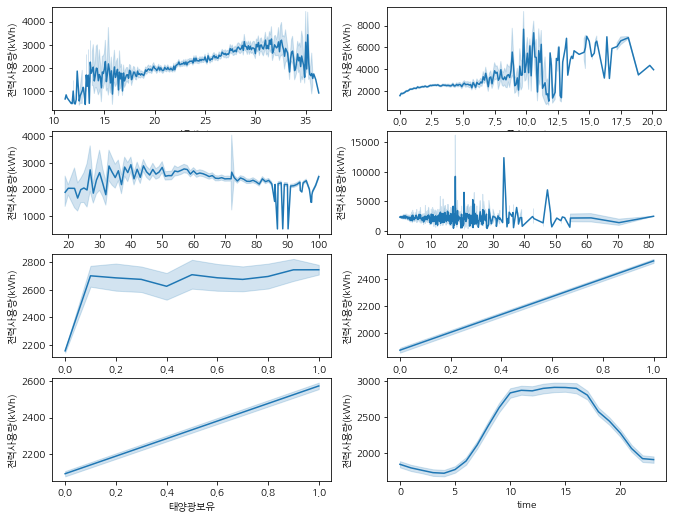

In [ ]:
fig = plt.figure(figsize=(11,11))
for j,i in enumerate(train.columns):
  if i in ['num','date_time', '전력사용량(kWh)']:
    continue
  ax = plt.subplot(5,2, j)
  sns.lineplot(x=i, y='전력사용량(kWh)', data=train, ax=ax)
plt.tight_layout()

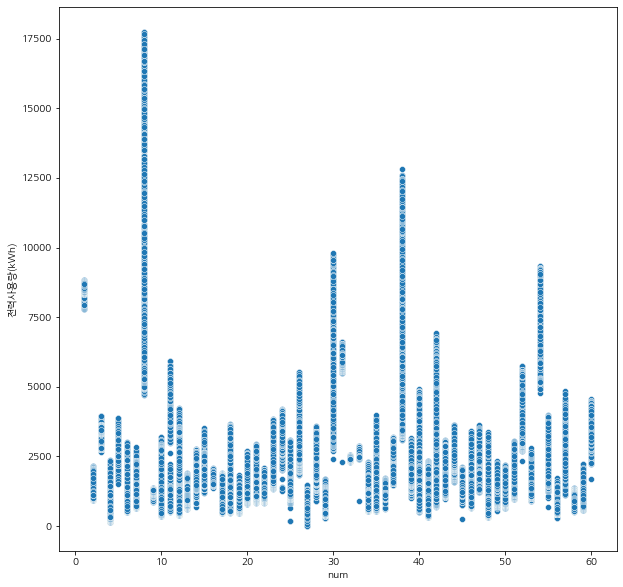

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='num', y='전력사용량(kWh)', data=train)

In [167]:
train['THI'] = 9/5*train['temp']-0.55*(1-train['hum']/100)*(9/5*train['temp']-26)+32  # 불쾌지수
test['THI'] = 9/5*test['temp']-0.55*(1-test['hum']/100)*(9/5*test['temp']-26)+32

In [168]:
# CDH feature추가
def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11:
            ys.append(np.sum(xs[:(i+1)]-26))
        else:
            ys.append(np.sum(xs[(i-11):(i+1)]-26))
    return np.array(ys)

cdhs = np.array([])
for num in range(1,61,1):
    temp = train[train['num'] == num]
    cdh = CDH(temp['temp'].values)
    cdhs = np.concatenate([cdhs, cdh])
train['CDH'] = cdhs

cdhs = np.array([])
for num in range(1,61,1):
    temp = test[test['num'] == num]
    cdh = CDH(temp['temp'].values)
    cdhs = np.concatenate([cdhs, cdh])
test['CDH'] = cdhs

In [74]:
train['부패지수'] = ((train['습도(%)']-65)/14)*1.054**train['기온(°C)']
test['부패지수'] = ((test['습도(%)']-65)/14)*1.054**test['기온(°C)']

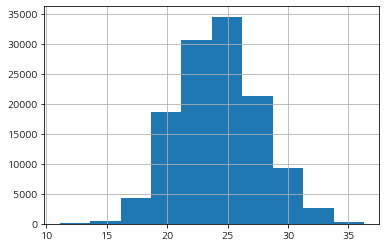

In [ ]:
train['기온(°C)'].hist()
# 동상은 고려 안해도 될듯

# 건물별로 군집을 시킨다.

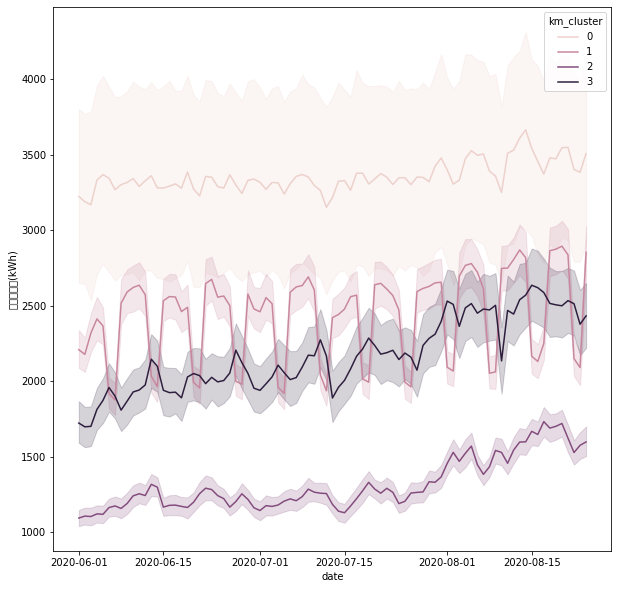

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(x='date', y='전력사용량(kWh)', hue='km_cluster', data=train)

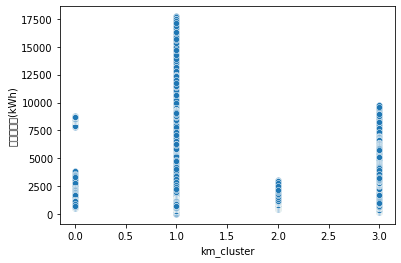

In [ ]:
sns.scatterplot(x='km_cluster', y='전력사용량(kWh)', data=train)

In [169]:
# 시간에 대한 변수를 많이 만들면 좋을것같은데...
train['date_time'] = pd.to_datetime(train['date_time'])
train['hour'] = train['date_time'].dt.hour
train['date'] = train['date_time'].dt.date
train['day'] = train['date_time'].dt.day
train['month'] = train['date_time'].dt.month
train['weekday'] = train['date_time'].dt.weekday + 1
train['weekend'] = train['weekday'].isin([6,7]).astype(int)


test['date_time'] = pd.to_datetime(test['date_time'])
test['hour'] = test['date_time'].dt.hour
test['date'] = test['date_time'].dt.date
test['day'] = test['date_time'].dt.day
test['month'] = test['date_time'].dt.month
test['weekday'] = test['date_time'].dt.weekday + 1
test['weekend'] = test['weekday'].isin([6,7]).astype(int)

In [ ]:
train['date_time'] = pd.to_datetime(train['date_time'])
train['weekday'] = train['date_time'].dt.weekday
train['weekend'] = train['weekday'].isin([5,6]).astype(int)
train['hour'] = train['date_time'].dt.hour

test['date_time'] = pd.to_datetime(test['date_time'])
test['weekday'] = test['date_time'].dt.weekday
test['weekend'] = test['weekday'].isin([5,6]).astype(int)
test['hour'] = test['date_time'].dt.hour

In [ ]:
train['weekday'] = train['date_time'].dt.weekday + 1
train['hour'] = train['date_time'].dt.hour

test['weekday'] = test['date_time'].dt.weekday + 1
test['hour'] = test['date_time'].dt.hour

In [170]:
from sklearn.cluster import k_means, KMeans
from sklearn.preprocessing import StandardScaler

# 건물을 기준으로 하는 data frame 생성
by_weekday = train.groupby(['num','weekday'])['target'].median().reset_index().pivot('num','weekday','target').reset_index()
by_hour = train.groupby(['num','hour'])['target'].median().reset_index().pivot('num','hour','target').reset_index().drop('num', axis = 1)
df = pd.concat([by_weekday, by_hour], axis= 1)
columns = ['num'] + ['day'+str(i) for i in range(7)] + ['hour'+str(i) for i in range(24)]
df.columns = columns

# '전력사용량'이 아닌 '요일과 시간대에 따른 전력 사용량의 경향성'에 따라서만 군집화 할 것이므로, 특수한 scaling이 필요함
# standard scaling
for i in range(len(df)):
    # 요일 별 전력 중앙값에 대해 scaling
    df.iloc[i,1:8] = (df.iloc[i,1:8] - df.iloc[i,1:8].mean())/df.iloc[i,1:8].std()
    # 시간대별 전력 중앙값에 대해 scaling
    df.iloc[i,8:] = (df.iloc[i,8:] - df.iloc[i,8:].mean())/df.iloc[i,8:].std()

kmeans = KMeans(n_clusters=4, random_state = 2)
km_cluster = kmeans.fit_predict(df.iloc[:,1:])

df_clust = df.copy()
df_clust['km_cluster'] = km_cluster

train = train.merge(df_clust[['num','km_cluster']], on = 'num', how = 'left')
test = test.merge(df_clust[['num','km_cluster']], on = 'num', how = 'left')

In [95]:
train

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,THI,CDH,hour,date,day,month,weekday,weekend,km_cluster
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,63.43008,-8.4,0,2020-06-01,1,6,1,0,0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,63.56993,-16.7,1,2020-06-01,1,6,1,0,0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,63.22775,-25.2,2,2020-06-01,1,6,1,0,0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,62.54339,-34.1,3,2020-06-01,1,6,1,0,0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,62.39760,-43.1,4,2020-06-01,1,6,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,77.80896,30.8,19,2020-08-24,24,8,1,0,3
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,77.44917,32.3,20,2020-08-24,24,8,1,0,3
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,77.44917,32.5,21,2020-08-24,24,8,1,0,3
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,77.52246,31.3,22,2020-08-24,24,8,1,0,3


In [ ]:
from sklearn.cluster import k_means, KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

d_list = []
for i in range(1, 61):
    d = train[train['num'] == i].copy()
    d['전력사용량(kWh)'] = scaler.fit_transform(d['전력사용량(kWh)'].values.reshape(-1,1))
    d_ = d.groupby(['weekday', 'hour'])['전력사용량(kWh)'].mean().unstack()
    d_list.append(d_.to_numpy())

# 정규화된 시간-요일별 전력사용량을 이미지처럼 저장
d_list = np.array(d_list)

d_list_ = d_list.reshape(60, -1)
model = KMeans(init="k-means++", n_clusters=4, random_state=0)
model.fit(d_list_)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

cluster = model.labels_
pd.DataFrame(cluster).value_counts()

1    31
2    17
3     7
0     5
dtype: int64

In [11]:
cluster_map = {i+1 : c for i, c in enumerate(cluster)}
train['cluster'] = train['num'].map(cluster_map)
test['cluster'] = test['num'].map(cluster_map)

NameError: ignored

In [171]:
# test 결측치 보간해줍니다.
# test 데이터의 변수는 예보 데이터이며, 예보 데이터는 train 데이터의 기간에 생성된 것이기에 활용 가능합니다.
test = test.interpolate(method='values')

In [172]:
x_train = train.drop(columns=['date_time', 'target', 'date'])
y_train = train['target']
x_test = test.drop(columns=['date_time', 'date'])

In [173]:
y_train

0         8179.056
1         8135.640
2         8107.128
3         8048.808
4         8043.624
            ...   
122395    4114.368
122396    3975.696
122397    3572.208
122398    3299.184
122399    3204.576
Name: target, Length: 122400, dtype: float64

In [174]:
x_train.shape, x_test.shape, y_train.shape

((122400, 16), (10080, 16), (122400,))

In [28]:
pip install catboost

     |████████████████████████████████| 69.2MB 53kB/s 


In [190]:
from sklearn.model_selection import KFold

n_splits = 5
seed = 0
cat_features = x_train.select_dtypes('object').columns
kf = KFold(n_splits=n_splits, random_state=seed, shuffle=False)
predict_cat = np.zeros((len(x_test),))

for i, (train_index, valid_index) in enumerate(kf.split(x_train, x_train['num'])):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_cat = catboost.CatBoostRegressor(n_estimators=5000, eval_metric='RMSE', use_best_model=True, learning_rate=0.01)
  model_cat.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], verbose=100, early_stopping_rounds=100)

  predict_cat = model_cat.predict(x_test) / skf.n_splits

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

0:	learn: 1698.3636574	test: 1698.3636574	test1: 3107.9526471	best: 3107.9526471 (0)	total: 18.2ms	remaining: 1m 30s
100:	learn: 1244.5885033	test: 1244.5885033	test1: 3182.7328915	best: 3107.9526471 (0)	total: 1.75s	remaining: 1m 25s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 3107.952647
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 2229.4222684	test: 2229.4222684	test1: 1130.8465751	best: 1130.8465751 (0)	total: 16.1ms	remaining: 1m 20s
100:	learn: 1706.1127668	test: 1706.1127668	test1: 929.5760277	best: 929.5760277 (100)	total: 1.59s	remaining: 1m 17s
200:	learn: 1368.3968070	test: 1368.3968070	test1: 844.0114344	best: 843.7117192 (199)	total: 3.22s	remaining: 1m 16s
300:	learn: 1126.8309051	test: 1126.8309051	test1: 810.5053278	best: 810.5053278 (300)	total: 4.85s	remaining: 1m 15s
400:	learn: 965.1728340	test: 965.1728340	test1: 801.4801477	best: 800.3536326 (395)	total: 6.47s	remaining: 1m 14s
500:	learn: 837.6437086	test: 837.6437086	te

KeyboardInterrupt: ignored

In [197]:
x_test = x_test.rename(columns={'강수량(mm, 6시간)':'rain'})

In [198]:
from sklearn.model_selection import StratifiedKFold
import catboost

n_splits = 5
seed = 0
cat_features = x_train.select_dtypes('object').columns
skf = StratifiedKFold(n_splits=n_splits, random_state=seed, shuffle=False)
predict_cat = np.zeros((len(x_test),))

for i, (train_index, valid_index) in enumerate(skf.split(x_train, x_train['num'])):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_cat = catboost.CatBoostRegressor(n_estimators=5000, eval_metric='RMSE', use_best_model=True, learning_rate=0.01)
  model_cat.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], verbose=100, early_stopping_rounds=70)

  predict_cat = model_cat.predict(x_test) / skf.n_splits

0:	learn: 2077.0318537	test: 2077.0318537	test1: 1944.8130690	best: 1944.8130690 (0)	total: 14.2ms	remaining: 1m 11s
100:	learn: 1586.2494684	test: 1586.2494684	test1: 1460.9866663	best: 1460.9866663 (100)	total: 1.71s	remaining: 1m 22s
200:	learn: 1331.1133128	test: 1331.1133128	test1: 1210.5183259	best: 1210.5183259 (200)	total: 3.3s	remaining: 1m 18s
300:	learn: 1102.2243172	test: 1102.2243172	test1: 996.4576959	best: 996.4576959 (300)	total: 4.93s	remaining: 1m 17s
400:	learn: 947.7794349	test: 947.7794349	test1: 855.4023177	best: 855.4023177 (400)	total: 6.56s	remaining: 1m 15s
500:	learn: 834.9176469	test: 834.9176469	test1: 752.3578448	best: 752.3578448 (500)	total: 8.19s	remaining: 1m 13s
600:	learn: 752.5840932	test: 752.5840932	test1: 680.4114123	best: 680.4114123 (600)	total: 9.79s	remaining: 1m 11s
700:	learn: 689.9573912	test: 689.9573912	test1: 627.8118843	best: 627.8118843 (700)	total: 11.4s	remaining: 1m 9s
800:	learn: 636.5903959	test: 636.5903959	test1: 584.4992122	be

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
import xgboost as xgb

In [192]:
from sklearn.model_selection import KFold

n_splits = 5
seed = 0
cat_features = x_train.select_dtypes('object').columns
kf = KFold(n_splits=n_splits, random_state=seed, shuffle=False)
predict_cat = np.zeros((len(x_test),))

for i, (train_index, valid_index) in enumerate(kf.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model = lgbm.LGBMRegressor(n_estimators=10000, objective='mse', )
  model.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], eval_metric='rmse', early_stopping_rounds=50, verbose=100)

  preds_lgbm += model.predict(x_test) / skf.n_splits

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	training's rmse: 1563.74	training's l2: 2.44527e+06	valid_1's rmse: 3115.84	valid_1's l2: 9.70845e+06
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[28]	training's rmse: 588.811	training's l2: 346699	valid_1's rmse: 1004.71	valid_1's l2: 1.00944e+06
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[1]	training's rmse: 1920.57	training's l2: 3.68859e+06	valid_1's rmse: 1851.21	valid_1's l2: 3.42697e+06
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 245.984	training's l2: 60508.3	valid_1's rmse: 1823.8	valid_1's l2: 3.32624e+06
Early stopping, best iteration is:
[55]	training's rmse: 314.429	training's l2: 98865.3	valid_1's rmse: 1815.89	valid_1's l2: 3.29744e+06
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration

In [191]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=40)
preds_lgbm = np.zeros((len(x_test)))
param_lgbms = {'learning_rate': 0.03751655787285152, 'min_data_in_leaf': 956, 'max_depth': 8, 'num_leaves': 67, "random_state": 42, "n_jobs": -1,}


for i,(train_index, test_index) in enumerate(skf.split(x_train, x_train['num'])):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[test_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[test_index]

  model = lgbm.LGBMRegressor(n_estimators=10000, objective='mse', )
  model.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], eval_metric='rmse', early_stopping_rounds=50, verbose=100)

  preds_lgbm += model.predict(x_test) / skf.n_splits

  

Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 288.195	training's l2: 83056.5	valid_1's rmse: 296.279	valid_1's l2: 87781.2
[200]	training's rmse: 233.006	training's l2: 54291.8	valid_1's rmse: 245.943	valid_1's l2: 60488.2
[300]	training's rmse: 205.112	training's l2: 42070.7	valid_1's rmse: 222.001	valid_1's l2: 49284.5
[400]	training's rmse: 190.301	training's l2: 36214.5	valid_1's rmse: 210.616	valid_1's l2: 44359
[500]	training's rmse: 177.239	training's l2: 31413.7	valid_1's rmse: 201.356	valid_1's l2: 40544.3


KeyboardInterrupt: ignored

In [ ]:
!pip install optuna

In [ ]:
import optuna
from lightgbm import LGBMClassifier
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.metrics import mean_squared_error
from optuna.integration import SkoptSampler


def objective(trial: Trial) -> float:
    params_lgb = {
        "random_state": 42,
        "n_jobs": -1,
        "learning_rate": trial.suggest_float('learning_rate', 0.0001, 0.2),
        'min_data_in_leaf':trial.suggest_int('min_data_in_leaf', 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "num_leaves": trial.suggest_int("num_leaves", 2, 110)
    }
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)
    preds_lgbm = np.zeros((len(x_test)))
    for i,(train_index, test_index) in enumerate(skf.split(x_train, x_train['num'])):
      X_train, X_valid = x_train.iloc[train_index], x_train.iloc[test_index]
      Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[test_index]

      model = lgbm.LGBMRegressor(n_estimators=10000, objective='mse')
      model.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], eval_metric='rmse', early_stopping_rounds=50, verbose=100)

  
      lgb_pred = model.predict(X_valid)
      RMSE=np.sqrt(mean_squared_error(Y_valid, lgb_pred))
      print(RMSE)
    
    return RMSE

In [ ]:
sampler = optuna.samplers.CmaEsSampler()
study = optuna.create_study(
    study_name="lgb_parameter_opt",
    direction="minimize"
)
study.optimize(objective, n_trials=100)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

[I 2021-06-01 07:58:39,317] A new study created in memory with name: lgb_parameter_opt


Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rmse: 142.234	trainin

[I 2021-06-01 08:02:28,882] Trial 0 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.19427754116938079, 'min_data_in_leaf': 109, 'max_depth': 10, 'num_leaves': 91}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 08:06:22,244] Trial 1 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.19043444126981582, 'min_data_in_leaf': 929, 'max_depth': 5, 'num_leaves': 93}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 08:10:15,721] Trial 2 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.15060647143155081, 'min_data_in_leaf': 138, 'max_depth': 4, 'num_leaves': 13}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 08:14:07,788] Trial 3 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.18174392080117957, 'min_data_in_leaf': 482, 'max_depth': 9, 'num_leaves': 27}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 08:17:59,623] Trial 4 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.17509023818882485, 'min_data_in_leaf': 159, 'max_depth': 7, 'num_leaves': 76}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 08:21:48,657] Trial 5 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.10437020719703861, 'min_data_in_leaf': 561, 'max_depth': 7, 'num_leaves': 57}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 08:25:38,908] Trial 6 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.028838272642788532, 'min_data_in_leaf': 283, 'max_depth': 3, 'num_leaves': 37}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 08:29:29,418] Trial 7 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.1596848330749209, 'min_data_in_leaf': 597, 'max_depth': 1, 'num_leaves': 96}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 08:33:22,442] Trial 8 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.08203333756482983, 'min_data_in_leaf': 990, 'max_depth': 1, 'num_leaves': 10}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 08:37:16,513] Trial 9 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.05370944953214486, 'min_data_in_leaf': 942, 'max_depth': 6, 'num_leaves': 91}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 08:41:14,005] Trial 10 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.12082170375417134, 'min_data_in_leaf': 381, 'max_depth': 10, 'num_leaves': 110}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 08:45:12,041] Trial 11 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.19580466326863818, 'min_data_in_leaf': 760, 'max_depth': 4, 'num_leaves': 73}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 08:49:08,577] Trial 12 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.19803743166468685, 'min_data_in_leaf': 799, 'max_depth': 8, 'num_leaves': 109}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 08:53:07,306] Trial 13 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.13195914038025489, 'min_data_in_leaf': 746, 'max_depth': 5, 'num_leaves': 88}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 08:57:05,551] Trial 14 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.19837457668327987, 'min_data_in_leaf': 873, 'max_depth': 10, 'num_leaves': 63}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:01:04,503] Trial 15 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.0018590895254497752, 'min_data_in_leaf': 311, 'max_depth': 2, 'num_leaves': 102}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:05:04,065] Trial 16 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.15164666856410278, 'min_data_in_leaf': 694, 'max_depth': 5, 'num_leaves': 81}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:09:10,220] Trial 17 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.16788286417028186, 'min_data_in_leaf': 424, 'max_depth': 10, 'num_leaves': 60}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:13:22,404] Trial 18 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.017418259929830503, 'min_data_in_leaf': 231, 'max_depth': 2, 'num_leaves': 106}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:17:31,008] Trial 19 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.14036555011299262, 'min_data_in_leaf': 650, 'max_depth': 6, 'num_leaves': 78}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:21:29,933] Trial 20 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.16663826244171762, 'min_data_in_leaf': 466, 'max_depth': 9, 'num_leaves': 45}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:25:28,700] Trial 21 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.000670045149450238, 'min_data_in_leaf': 218, 'max_depth': 9, 'num_leaves': 63}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:29:32,857] Trial 22 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.07589907766957035, 'min_data_in_leaf': 632, 'max_depth': 3, 'num_leaves': 104}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:33:34,276] Trial 23 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.13423077117376972, 'min_data_in_leaf': 650, 'max_depth': 8, 'num_leaves': 44}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:37:33,045] Trial 24 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.0530447762948694, 'min_data_in_leaf': 126, 'max_depth': 9, 'num_leaves': 44}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:41:32,208] Trial 25 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.07594503307207477, 'min_data_in_leaf': 102, 'max_depth': 3, 'num_leaves': 68}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:45:32,693] Trial 26 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.10894367162780542, 'min_data_in_leaf': 622, 'max_depth': 8, 'num_leaves': 23}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:49:32,609] Trial 27 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.05007883029969963, 'min_data_in_leaf': 334, 'max_depth': 8, 'num_leaves': 48}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:53:38,382] Trial 28 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.07904762958014876, 'min_data_in_leaf': 107, 'max_depth': 10, 'num_leaves': 69}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 09:57:43,717] Trial 29 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.10358059207104425, 'min_data_in_leaf': 538, 'max_depth': 7, 'num_leaves': 25}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 10:01:50,066] Trial 30 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.04184048275446932, 'min_data_in_leaf': 345, 'max_depth': 8, 'num_leaves': 2}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 10:05:55,293] Trial 31 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.08914023315329493, 'min_data_in_leaf': 202, 'max_depth': 10, 'num_leaves': 30}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 10:10:09,419] Trial 32 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.06855876406864886, 'min_data_in_leaf': 506, 'max_depth': 7, 'num_leaves': 49}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 10:14:19,704] Trial 33 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.03633209770782479, 'min_data_in_leaf': 389, 'max_depth': 7, 'num_leaves': 3}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 10:18:23,450] Trial 34 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.09424458742941275, 'min_data_in_leaf': 197, 'max_depth': 9, 'num_leaves': 20}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 10:22:37,743] Trial 35 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.18755098803484344, 'min_data_in_leaf': 441, 'max_depth': 9, 'num_leaves': 84}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 10:27:03,902] Trial 36 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.17803240887141433, 'min_data_in_leaf': 255, 'max_depth': 4, 'num_leaves': 98}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

[I 2021-06-01 10:31:42,718] Trial 37 finished with value: 150.54804305034378 and parameters: {'learning_rate': 0.0006077742650416353, 'min_data_in_leaf': 481, 'max_depth': 9, 'num_leaves': 34}. Best is trial 0 with value: 150.54804305034378.


150.54804305034378
Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 287.309	training's l2: 82546.5	valid_1's rmse: 294.642	valid_1's l2: 86813.9
[200]	training's rmse: 230.118	training's l2: 52954.4	valid_1's rmse: 244.193	valid_1's l2: 59630.2
[300]	training's rmse: 206.486	training's l2: 42636.3	valid_1's rmse: 225.701	valid_1's l2: 50940.8
[400]	training's rmse: 188.002	training's l2: 35344.9	valid_1's rmse: 211.928	valid_1's l2: 44913.3
[500]	training's rmse: 177.341	training's l2: 31449.8	valid_1's rmse: 204.994	valid_1's l2: 42022.7
[600]	training's rmse: 168.554	training's l2: 28410.4	valid_1's rmse: 199.38	valid_1's l2: 39752.4
[700]	training's rmse: 160.533	training's l2: 25770.9	valid_1's rmse: 194.361	valid_1's l2: 37776.1
[800]	training's rmse: 153.695	training's l2: 23622.3	valid_1's rmse: 190.213	valid_1's l2: 36180.8
[900]	training's rmse: 146.737	training's l2: 21531.7	valid_1's rmse: 186.376	valid_1's l2: 34736.1
[1000]	training's rm

KeyboardInterrupt: ignored

In [188]:
submission = submission.copy()
submission['answer'] = predict_cat

submission.to_csv('/content/drive/MyDrive/dataset/Dacon/대회/전력사용량 예측 AI 경진대회/2021-06-4_2.csv', index= False)

In [84]:
submission

,num_date_time,answer
0,1 2020-08-25 00,1744.030928
1,1 2020-08-25 01,1737.126212
2,1 2020-08-25 02,1734.663997
3,1 2020-08-25 03,1737.870409
4,1 2020-08-25 04,1733.965360
...,...,...
10075,60 2020-08-31 19,769.681930
10076,60 2020-08-31 20,724.369070
10077,60 2020-08-31 21,742.115760
10078,60 2020-08-31 22,707.687871
